## Package Download

Pada bagian ini dilakukan proses pengunduhan terhadap package-package NLTK yang akan digunakan dalam eksperimen

In [155]:
nltk.download("wordnet")
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## Training Data

Pada bagian ini dilakukan pembacaan terhadap Training Data serta preproses terhadap training data tersebut

### Read and Extract Training Data

Pada bagian ini dilakukan pembacaan serta pengekstrasian data pembelajaran dari file .tsv

In [207]:
import nltk
import pandas as pd

In [208]:
df = pd.read_csv("./train_data_restaurant.tsv", header=None, sep='\t')

In [209]:
df.columns = ['statement','sentiment']
df['sentiment'] = df['sentiment'] == 'positive'
df.head()

statement  sentiment
0  Saya makan di sini dengan menggunakan voucher ...      False
1  Mas indosat buat main game enemy has been slai...      False
2  Trus sy percuma dong update no hp terbaru ke c...      False
3  jika kita pilih dia maka akan ada lebih dari 3...      False
4  Dikarenakan adik saya suka dengan restoran ini...      False

### Create Statement Token

Pada bagian ini dilakukan proses Tokenisasi terhadap statement review

In [210]:
df['statement_token'] = df.apply(lambda row: nltk.word_tokenize(row['statement']), axis=1)
df.head()

statement  sentiment  \
0  Saya makan di sini dengan menggunakan voucher ...      False   
1  Mas indosat buat main game enemy has been slai...      False   
2  Trus sy percuma dong update no hp terbaru ke c...      False   
3  jika kita pilih dia maka akan ada lebih dari 3...      False   
4  Dikarenakan adik saya suka dengan restoran ini...      False   

                                     statement_token  
0  [Saya, makan, di, sini, dengan, menggunakan, v...  
1  [Mas, indosat, buat, main, game, enemy, has, b...  
2  [Trus, sy, percuma, dong, update, no, hp, terb...  
3  [jika, kita, pilih, dia, maka, akan, ada, lebi...  
4  [Dikarenakan, adik, saya, suka, dengan, restor...

### POS Tagger (Unused)

Pada bagian ini dilakukan proses POS Tagging untuk setiap statement yang telah ditokenisasi menggunakan library pos tagger bahasa indonesia dari http://bahasa.cs.ui.ac.id/postag/tagger, namun bagian ini masih belum diperhitungkan pada keseluruhan model akhir

In [161]:
from nltk.tag import CRFTagger
ct = CRFTagger()
ct.set_model_file('indo_pos.tagger')

In [162]:
df['statement_postag'] = df.apply(lambda row: ct.tag_sents([row['statement_token']])[0], axis=1)
df.head()

statement  sentiment  \
0  Saya makan di sini dengan menggunakan voucher ...      False   
1  Mas indosat buat main game enemy has been slai...      False   
2  Trus sy percuma dong update no hp terbaru ke c...      False   
3  jika kita pilih dia maka akan ada lebih dari 3...      False   
4  Dikarenakan adik saya suka dengan restoran ini...      False   

                                     statement_token  \
0  [Saya, makan, di, sini, dengan, menggunakan, v...   
1  [Mas, indosat, buat, main, game, enemy, has, b...   
2  [Trus, sy, percuma, dong, update, no, hp, terb...   
3  [jika, kita, pilih, dia, maka, akan, ada, lebi...   
4  [Dikarenakan, adik, saya, suka, dengan, restor...   

                                    statement_postag  
0  [(Saya, PRP), (makan, VB), (di, IN), (sini, PR...  
1  [(Mas, NN), (indosat, NN), (buat, IN), (main, ...  
2  [(Trus, FW), (sy, FW), (percuma, FW), (dong, F...  
3  [(jika, SC), (kita, PRP), (pilih, VB), (dia, P...  
4  [(Dikarenakan, VB), (adik, NN), (saya, PRP), (...

### Stemming

Pada bagian ini dilakukan proses stemming untuk menghilangkan imbuhan pada review bahasa indonesia dengan menggunakan library Sastrawi

In [211]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

stemmer = StemmerFactory().create_stemmer()

In [212]:
stemmedStatement = df.apply(lambda row: stemmer.stem(row['statement']), axis=1).to_frame()
# stemmedStatement.isna().values.any()
stemmedStatement[1] = stemmedStatement[0].apply(nltk.word_tokenize)
stemmedStatement.columns = ['statement', 'statement_token']
stemmedStatement

statement  \
0     saya makan di sini dengan guna voucher disdus ...   
1     mas indosat buat main game enemy has been slai...   
2     trus sy percuma dong update no hp baru ke cs c...   
3     jika kita pilih dia maka akan ada lebih dari 3...   
4     karena adik saya suka dengan restoran ini saya...   
...                                                 ...   
1775  sangat suka minum di sini selain merah riah ra...   
1776  saat pertama saya lihat suasana di damai resto...   
1777  restoran yang letak di kawasan intercontinenta...   
1778  pilih kaya baso2 dll ny banyakk di sini macem2...   
1779  menu utama adalah suki beda dengan resto suki ...   

                                        statement_token  
0     [saya, makan, di, sini, dengan, guna, voucher,...  
1     [mas, indosat, buat, main, game, enemy, has, b...  
2     [trus, sy, percuma, dong, update, no, hp, baru...  
3     [jika, kita, pilih, dia, maka, akan, ada, lebi...  
4     [karena, adik, saya, suka, dengan, restoran, i...  
...                                                 ...  
1775  [sangat, suka, minum, di, sini, selain, merah,...  
1776  [saat, pertama, saya, lihat, suasana, di, dama...  
1777  [restoran, yang, letak, di, kawasan, intercont...  
1778  [pilih, kaya, baso2, dll, ny, banyakk, di, sin...  
1779  [menu, utama, adalah, suki, beda, dengan, rest...  

[1780 rows x 2 columns]

In [213]:
stemmedStatement.columns = ['stemmed_statement', 'stemmed_statement_token']
stemmedStatement.head()

stemmed_statement  \
0  saya makan di sini dengan guna voucher disdus ...   
1  mas indosat buat main game enemy has been slai...   
2  trus sy percuma dong update no hp baru ke cs c...   
3  jika kita pilih dia maka akan ada lebih dari 3...   
4  karena adik saya suka dengan restoran ini saya...   

                             stemmed_statement_token  
0  [saya, makan, di, sini, dengan, guna, voucher,...  
1  [mas, indosat, buat, main, game, enemy, has, b...  
2  [trus, sy, percuma, dong, update, no, hp, baru...  
3  [jika, kita, pilih, dia, maka, akan, ada, lebi...  
4  [karena, adik, saya, suka, dengan, restoran, i...

### Stop Words Removal

Pada bagian ini dilakukan penghapusan stop words dari statement review yang masuk

In [214]:
from nltk.corpus import stopwords
import re

sw = list(set(stopwords.words('indonesian')))

In [215]:
stemmedStatement['stemmed_statement_token'] = stemmedStatement['stemmed_statement_token'].apply(lambda x: [item for item in x if item not in sw])
stemmedStatement.head()

stemmed_statement  \
0  saya makan di sini dengan guna voucher disdus ...   
1  mas indosat buat main game enemy has been slai...   
2  trus sy percuma dong update no hp baru ke cs c...   
3  jika kita pilih dia maka akan ada lebih dari 3...   
4  karena adik saya suka dengan restoran ini saya...   

                             stemmed_statement_token  
0  [makan, voucher, disdus, paket, nasi, ayam, ka...  
1  [mas, indosat, main, game, enemy, has, been, s...  
2  [trus, sy, update, no, hp, cs, cab, bni, kalo,...  
3                       [pilih, 300, kampung, gusur]  
4  [adik, suka, restoran, mampir, sih, langsung, ...

### Stemmed POS Tag (Unused)

Pada bagian ini diberikan nilai POS Tag untuk token yang telah di Stem, namun pada eksperimen bagian ini masih belum dipakai

In [168]:
df['statement_stemmed'] = pd.concat([df, stemmedStatement], axis=1, sort=False).apply(lambda row: list(zip(row['stemmed_statement_token'],list(zip(*row['statement_postag']))[1])), axis=1)
df.head()

statement  sentiment  \
0  Saya makan di sini dengan menggunakan voucher ...      False   
1  Mas indosat buat main game enemy has been slai...      False   
2  Trus sy percuma dong update no hp terbaru ke c...      False   
3  jika kita pilih dia maka akan ada lebih dari 3...      False   
4  Dikarenakan adik saya suka dengan restoran ini...      False   

                                     statement_token  \
0  [Saya, makan, di, sini, dengan, menggunakan, v...   
1  [Mas, indosat, buat, main, game, enemy, has, b...   
2  [Trus, sy, percuma, dong, update, no, hp, terb...   
3  [jika, kita, pilih, dia, maka, akan, ada, lebi...   
4  [Dikarenakan, adik, saya, suka, dengan, restor...   

                                    statement_postag  \
0  [(Saya, PRP), (makan, VB), (di, IN), (sini, PR...   
1  [(Mas, NN), (indosat, NN), (buat, IN), (main, ...   
2  [(Trus, FW), (sy, FW), (percuma, FW), (dong, F...   
3  [(jika, SC), (kita, PRP), (pilih, VB), (dia, P...   
4  [(Dikarenakan, VB), (adik, NN), (saya, PRP), (...   

                                   statement_stemmed  
0  [(saya, PRP), (makan, VB), (di, IN), (sini, PR...  
1  [(mas, NN), (indosat, NN), (buat, IN), (main, ...  
2  [(trus, FW), (sy, FW), (percuma, FW), (dong, F...  
3  [(jika, SC), (kita, PRP), (pilih, VB), (dia, P...  
4  [(karena, VB), (adik, NN), (saya, PRP), (suka,...

In [169]:
all_pos_words =stemmedStatement['stemmed_statement_token'].sum()

In [170]:
from nltk import FreqDist

freq_dist_pos  = FreqDist(all_pos_words)
freq_dist_pos.most_common(10)

[('dan', 1916),
 ('yang', 1633),
 ('makan', 1578),
 ('di', 1549),
 ('saya', 1205),
 ('enak', 886),
 ('tempat', 883),
 ('dengan', 858),
 ('untuk', 780),
 ('ini', 763)]

In [171]:
token_stemmed = df['statement_stemmed'].sum()
token_stemmed_ = list(list(zip(*token_stemmed))[0])

In [172]:
token_stemmedd = df[['statement_stemmed','sentiment']]
token_stemmedd

statement_stemmed  sentiment
0     [(saya, PRP), (makan, VB), (di, IN), (sini, PR...      False
1     [(mas, NN), (indosat, NN), (buat, IN), (main, ...      False
2     [(trus, FW), (sy, FW), (percuma, FW), (dong, F...      False
3     [(jika, SC), (kita, PRP), (pilih, VB), (dia, P...      False
4     [(karena, VB), (adik, NN), (saya, PRP), (suka,...      False
...                                                 ...        ...
1775  [(sangat, RB), (suka, VB), (minum, NN), (di, I...       True
1776  [(saat, NN), (pertama, OD), (saya, PRP), (liha...       True
1777  [(restoran, NN), (yang, SC), (letak, VB), (di,...       True
1778  [(pilih, NN), (kaya, JJ), (baso2, CD), (dll, F...       True
1779  [(menu, NN), (utama, JJ), (adalah, VB), (suki,...       True

[1780 rows x 2 columns]

### Word Extraction

Pada bagian ini diambil kata-kata yang masuk dalam data pembelajaran

In [216]:
fin_data = []
for x,y in zip(token_stemmedd['statement_stemmed'].values.tolist(), token_stemmedd['sentiment'].values.tolist()) :
    for e1,e2 in x :
        fin_data.append([''.join([c for c in e1 if c.isalpha()]),e2,y])
fin_df = pd.DataFrame.from_records(fin_data)
fin_df.columns = ['word','pos_tag','sentiment']
fin_df.head()

word pos_tag  sentiment
0    saya     PRP      False
1   makan      VB      False
2      di      IN      False
3    sini      PR      False
4  dengan      SC      False

In [223]:
unique_words = fin_df['word'].unique()
len_words = len(unique_words)
len_words_max = 0
for e in unique_words :
    if(len_words_max < len(e)):
        len_words_max = len(e)

print(len_words)
print(len_words_max)
    

5301
17


### Sentence Embedding

Pada bagian ini dilakukan perubahan dari kalimat review menjadi representasi vektor yang dapat dilakukan pembelajaran

In [224]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

In [225]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

tokenizer = Tokenizer(num_words=len_words)
tokenizer.fit_on_texts(fin_df['word'].tolist())
X_train = tokenizer.texts_to_sequences(df['statement'])
X_train = sequence.pad_sequences(X_train, maxlen=len_words_max)
pd.DataFrame(X_train)

0    1     2     3     4     5     6     7     8     9    10    11  \
0     2677   12    13   817     9    69    41    57    78  1123   210    53   
1     2678   31   323  2679  2680  2681  2682  2683   297   711   710  1245   
2     2687  818  1975    22  2688  1976  1977   175  2689     4  1977    85   
3        0    0     0     0     0   168    66    32   609   442   157    13   
4     1124    2    35     5     1     5     1   235   260    84   303   107   
...    ...  ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
1775   231   26   115     5    85   397   270   204   161   188   273     5   
1776    19   71  5295  1292     1  5296  5297     2   178     5     5    19   
1777    18   18   185   120   730    20   273    28    18     2    33     6   
1778     0    0     0     0   373   396  1238  2616     4     1   174   281   
1779   235  473    17   795    47   294   327   294   242   392   242  2413   

       12    13    14    15   16  
0      29   119    12   119  532  
1     710  1973   331  1973  324  
2     818  1975    78   870   87  
3      42    27   468    58  157  
4       4   273    23     2   12  
...   ...   ...   ...   ...  ...  
1775   57  2137    90   163  927  
1776  313     4  2671    75    8  
1777    1   257     8    14    2  
1778    4    21    15    33  581  
1779  294   149   120    17  345  

[1780 rows x 17 columns]

In [226]:
target = df['sentiment'].values
y_train=to_categorical(target)
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

## Test Data Preprocessing

Pada bagian ini dilakukan preproses terhadap data yang akan menjadi tester

In [227]:
df_test = pd.read_csv("./test_data_restaurant.tsv", header=None, sep='\t')
df_test.columns = ['statement','sentiment']
df_test['sentiment'] = df_test['sentiment'] == 'positive'
df_test.head()

statement  sentiment
0  Tempatnya sih menarik, mudah dijangkau dari se...      False
1  lokasi strategis penasaran karena daerah situ ...      False
2  Sesuai namanya, restoran ini unik dalam menyaj...      False
3  Saya datang ketika petang dan hujan deras temp...      False
4  Kalao mau ke sana jangan pas malem sih, soalny...      False

In [228]:
X_test = tokenizer.texts_to_sequences(df_test['statement'])
X_test = sequence.pad_sequences(X_test, maxlen=len_words_max)
pd.DataFrame(X_test)

0     1     2    3     4     5     6     7     8    9    10    11  \
0     13     5    32  241  1393  3684   188   286   130   26     2   381   
1     11    35    91   56  1090   241    15    35    91    2   189   180   
2    344   120   452    2    42    47   902   105    27  837   231   430   
3    216    13  1406    1   445   319     2    44    37    6     8    17   
4    114    58   854   29   850    40   123    33   458   17  1329  1329   
..   ...   ...   ...  ...   ...   ...   ...   ...   ...  ...   ...   ...   
180   29    66   459    7    91  3709   107  1168   643   23   108     6   
181  256   859  2128   23    27  4631     2   738   252   15    23     2   
182  799     7    10   61    15    87    26   121  2324    2   912   179   
183    8  2537   440   24   174     4   101    33     4  435   435     4   
184  382   382     1   72     4   192  3497    12  2353   47     7   859   

       12   13   14    15    16  
0      42   23  732  1393  3684  
1       3  479  621   660   933  
2      11  303   13     2   275  
3     184  277  188   189  2159  
4     180  458  613   613    91  
..    ...  ...  ...   ...   ...  
180    31   15  923     4    21  
181    23    1    6    13    15  
182     1   15  295     2   409  
183   193  467    2   179  1036  
184  1485  537  359    98    43  

[185 rows x 17 columns]

In [229]:
target_test = df_test['sentiment'].values
y_test=to_categorical(target_test)

## Model Creation

Pada bagian ini dilakukan pembuatan model deep learning untuk pembelajaran

Early Stopping diset untuk menghindari kondisi Overfitting

In [242]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(min_delta = 0.001, mode = 'max', monitor='accuracy', patience = 2)
callback = [early_stopping]

Layer yang dipakai dalam model berupa sebuah layer embedding untuk mengatur input, dua buah layer LSTM, sebuah layer Dense dengan fungsi aktivasi relu yang diikuti dengan layer dropout dan layer dense untuk keluaran dengan fungsi aktivasi softmax

Perhitungan performansi yang dilakukan menggunakan metric akurasi

In [243]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Embedding,LSTM
from tensorflow.keras.optimizers import Adam

model=Sequential()
model.add(Embedding(len_words,300,input_length=len_max))
model.add(LSTM(128,dropout=0.5, recurrent_dropout=0.5,return_sequences=True))
model.add(LSTM(64,dropout=0.5, recurrent_dropout=0.5,return_sequences=False))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.005),metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 17, 300)           1590300   
_________________________________________________________________
lstm_20 (LSTM)               (None, 17, 128)           219648    
_________________________________________________________________
lstm_21 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dense_20 (Dense)             (None, 100)               6500      
_________________________________________________________________
dropout_10 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 2)                 202       
Total params: 1,866,058
Trainable params: 1,866,058
Non-trainable params: 0
___________________________________________

Proses pembelajaran dengan pembelajaran setiap waktunya disimpan dalam variabel history

In [244]:
history=model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=6, batch_size=256, verbose=1, callbacks=callback)

Train on 1780 samples, validate on 185 samples
Epoch 1/6
1780/1780 [==============================] - 4s 2ms/sample - loss: 0.6355 - accuracy: 0.6573 - val_loss: 0.5477 - val_accuracy: 0.6486
Epoch 2/6
1780/1780 [==============================] - 1s 583us/sample - loss: 0.4357 - accuracy: 0.7961 - val_loss: 0.3446 - val_accuracy: 0.8541
Epoch 3/6
1780/1780 [==============================] - 1s 611us/sample - loss: 0.2348 - accuracy: 0.9124 - val_loss: 0.3844 - val_accuracy: 0.8486
Epoch 4/6
1780/1780 [==============================] - 1s 588us/sample - loss: 0.1493 - accuracy: 0.9455 - val_loss: 0.6701 - val_accuracy: 0.8054
Epoch 5/6
1780/1780 [==============================] - 1s 582us/sample - loss: 0.0812 - accuracy: 0.9742 - val_loss: 1.1084 - val_accuracy: 0.7622
Epoch 6/6
1780/1780 [==============================] - 1s 575us/sample - loss: 0.0527 - accuracy: 0.9848 - val_loss: 1.1935 - val_accuracy: 0.7405


Grafik yang memperlihatkan nilai loss dari pembelajaran

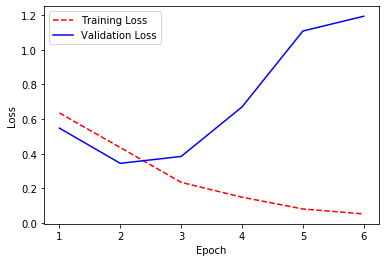

In [245]:
%matplotlib inline
import matplotlib.pyplot as plt

epoch_count = range(1, len(history.history['loss']) + 1)

plt.plot(epoch_count, history.history['loss'], 'r--')
plt.plot(epoch_count, history.history['val_loss'], 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Grafik yang memperlihatkan akurasi dari model pembelajaran

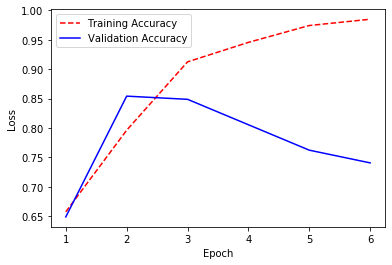

In [246]:
plt.plot(epoch_count, history.history['accuracy'], 'r--')
plt.plot(epoch_count, history.history['val_accuracy'], 'b-')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [201]:
y_predict = model.predict(X_test)

## Referensi

[1] https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews

[2] http://bahasa.cs.ui.ac.id/postag/tagger

[3] www.nltk.org

[4] https://pypi.org/project/Sastrawi/